In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
entry_questions = ["Spending time outside", "Solo or Group", "Quiet environment", "Brain over body", "Patience"]

In [3]:
nodes = {
    0: "music", 1: "club_music", 2: "concert", 3: "jazz", 4: "classical_music",
    5: "opera", 6: "recital", 7: "board_games", 8: "card_games", 9: "spiritual",
    10: "handwork", 11: "politics", 12: "nature", 13: "trips", 14: "dancing", 
    15: "fashion", 16: "latino_culture", 17: "long_term_commitment", 18: "memorization",
    19: "asian_culture", 20: "physical", 21: "martial_arts", 22: "muay_thai",
    23: "mountains", 24: "videography", 25: "history", 26: "improvisation",
    27: "planning", 28: "quick_decision", 29: "speeches", 30: "hidden_meaning",
    31: "introvert", 32: "extravert", 33: "outsider", 34: "constantly_improving",
    35: "social", 36: "technology", 37: "sense_of_rhythm", 38: "attention_to_detail",
    39: "creativity", 40: "body_coordination", 41: "focus", 42: "problem-solving",
    43: "self-expression", 44: "social_connection", 45: "resilience", 46: "curiosity",
    47: "outside", 48: "inside", 49: "solo", 50: "group", 51: "quiet_env",
    52: "brain", 53: "patience", 54: "eternalization", 55: "digital_arts"
}

In [4]:
paths = [[0, 1], [0, 2], [0, 3], [0, 4], [0,5], [0,6],
         [4,5], [7, 8], [0, 14], [14, 15], [14, 19], [12, 18],
         [13, 18], [20, 21], [21, 22], [17, 34], [33, 31], [33, 12],
         [33, 13], [33, 23], [33, 36], [36, 42], [32, 35], [42, 46],
         [47, 12], [47, 13], [47, 23], [47, 2], [48, 0], [48, 7],
         [48, 10], [48, 36], [48, 15], [48, 10], [29, 11], [32, 33],
         [32, 44], [50, 44], [50, 52], [45, 22], [23, 45], [45, 40],
         [46, 36], [46, 42], [46, 41], [43, 0], [43, 14], [43, 9],
         [37, 0], [37, 14], [53, 42], [53, 34], [53, 17], [53, 11],
         [16, 14], [16, 9], [26, 11], [26, 3], [49, 10], [49, 41], [49, 29], 
         [51, 41], [51, 31], [51, 12], [27, 52], [27, 8], [24, 54], [24, 55],
         [30, 33], [30, 9], [30, 11], [39, 54], [39, 27], [38, 10], [38, 49],
         [38, 52], [28, 21], [28, 14], [28, 26]
        ] 
paths = np.array(paths)

In [38]:
from py2neo import Graph, Node, Relationship, Path

In [49]:
graph = Graph("bolt://localhost:7687", auth=("neo4j", "password123"))

for key, name in nodes.items():
    graph.run("CREATE (:Preference {name: $name, idx: $idx})", name=name, idx=key)

for path in paths:
    graph.run("""
        MATCH
          (a:Preference),
          (b:Preference)
        WHERE a.name = $aname AND b.name = $bname
        CREATE (a)-[r:References]->(b)
        RETURN type(r)
    """, aname=nodes[path[0]], bname=nodes[path[1]])

In [5]:
n_nodes = max(nodes.keys()) + 1
adj_matr = np.zeros((n_nodes, n_nodes))

In [6]:
for x, y in paths:
    adj_matr[y, x] = 1
    adj_matr[x, y] = 1

In [8]:
G = nx.from_numpy_array(adj_matr)

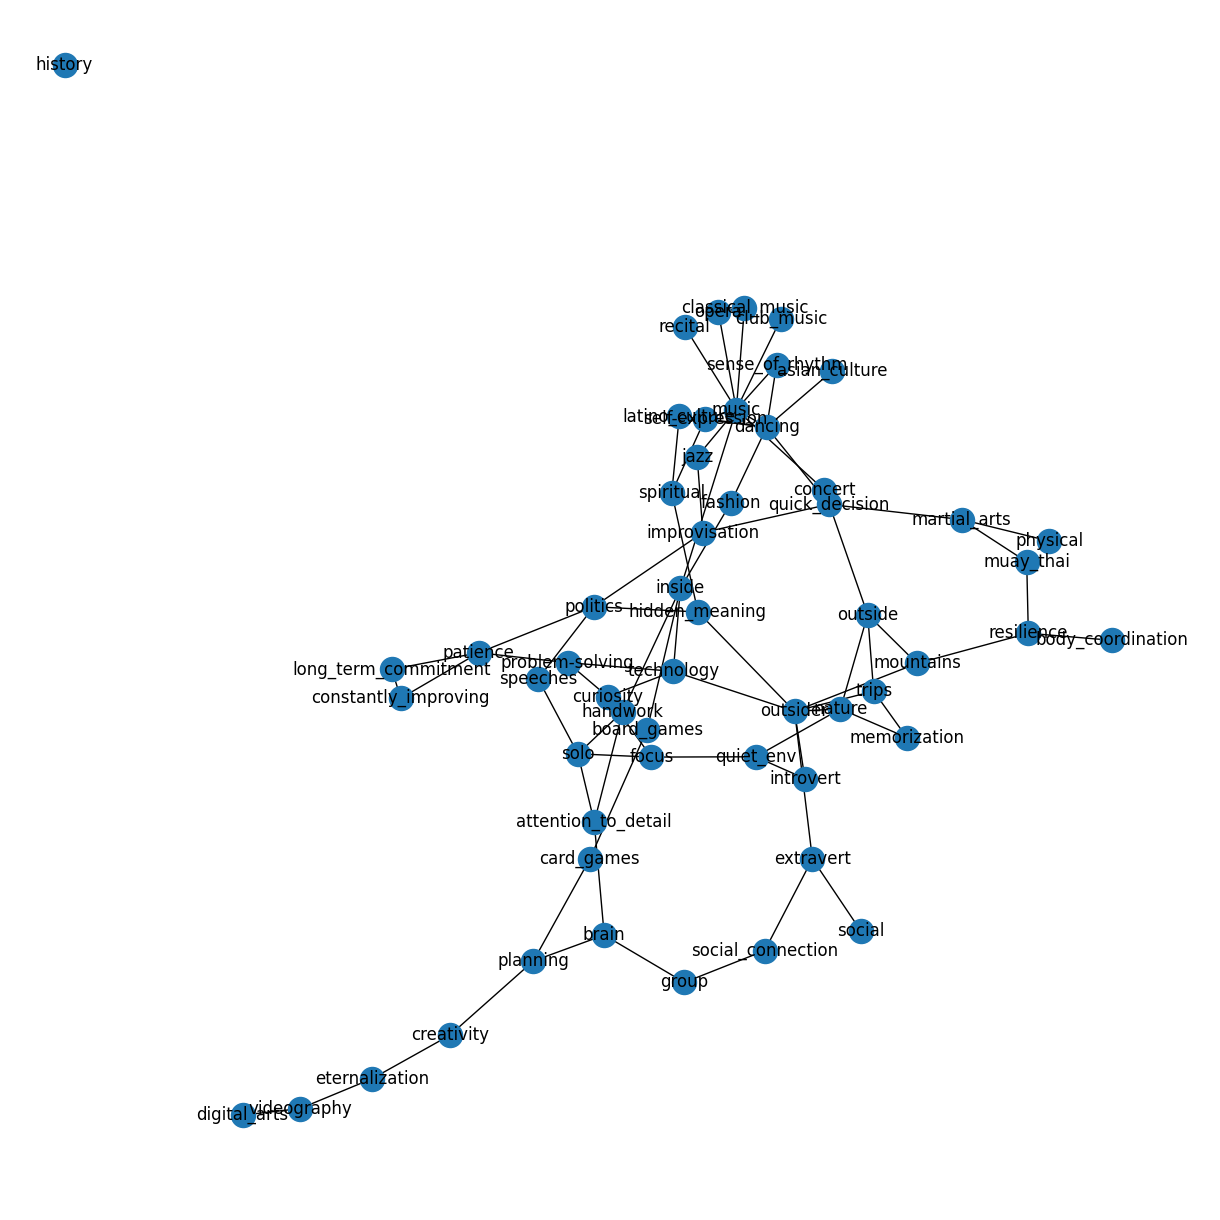

In [9]:
plt.figure(3,figsize=(12,12))
nx.draw_spring(G, labels=nodes, with_labels=True)

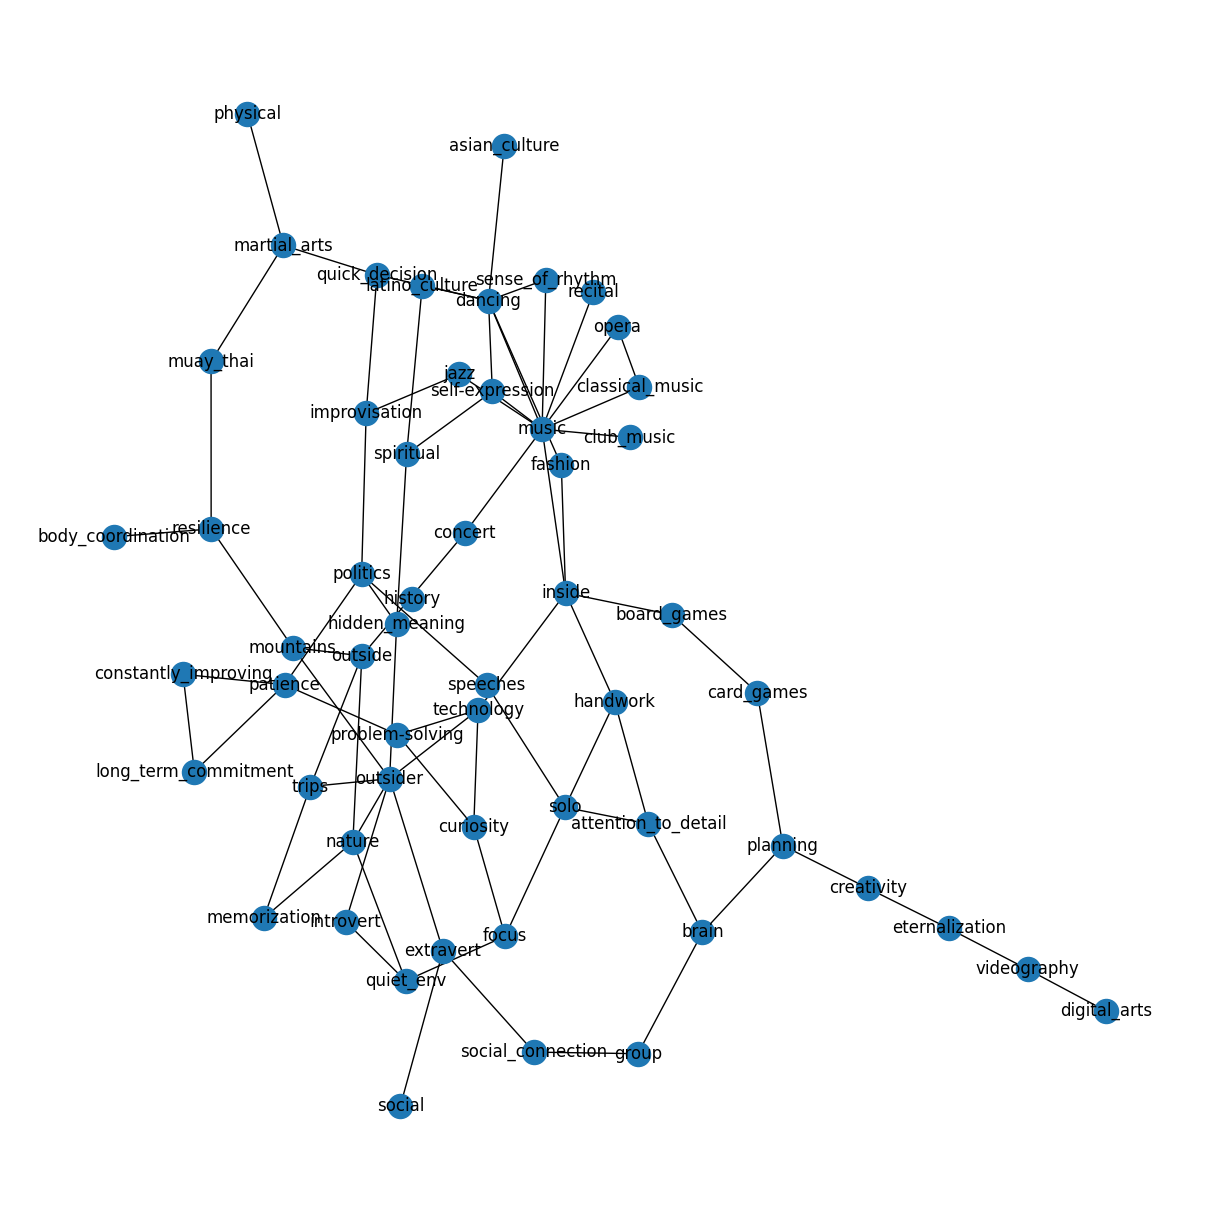

In [10]:
plt.figure(3,figsize=(12,12))
nx.draw_kamada_kawai(G, labels=nodes, with_labels=True)

In [4]:
d = {2: True, 5: False, 10: True, 11: False}
d.keys()

dict_keys([2, 5, 10, 11])

In [12]:
[key for key, value in d.items() if value is False]

[5, 11]

In [10]:
list(filter(lambda x: x==True, d.items()))

[]

In [13]:
import numpy as np

In [22]:
x = np.array([[0,1,1], [1,0,0], [1,0,0]])

In [23]:
x[[2]] = 0
x[:, [2]] = 0

In [24]:
x

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 0]])

In [48]:
n_nodes = 12
adj_matr = np.zeros((n_nodes, n_nodes))
paths = [[1,2],[1,3],[3,5],[4,5],[1,4],[1,7],[7,8],[5,6],[6,10],[6,11],[6,9], [1,5]]

In [49]:
for x, y in paths:
    adj_matr[y, x] = 1
    adj_matr[x, y] = 1

In [50]:
adj_matr

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [118]:
adj_matr[[]].sum(axis=0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [100]:
adj_edges = adj_matr[[1, 3]].sum(axis=0)

adj_edges[[1,3]] = 0
p = adj_edges / sum(adj_edges)

In [101]:
np.nonzero(adj_edges)[0]

array([2, 4, 5, 7], dtype=int64)

In [102]:
adj_edges

array([0., 0., 1., 0., 1., 2., 0., 1., 0., 0., 0., 0.])

In [103]:
adj_edges

array([0., 0., 1., 0., 1., 2., 0., 1., 0., 0., 0., 0.])

In [104]:
p

array([0. , 0. , 0.2, 0. , 0.2, 0.4, 0. , 0.2, 0. , 0. , 0. , 0. ])

In [106]:
p[np.nonzero(adj_edges)[0]]

array([0.2, 0.2, 0.4, 0.2])

In [110]:
np.random.choice(np.nonzero(adj_edges)[0], p=p[np.nonzero(adj_edges)[0]])

5

In [3]:
d.values()

dict_values([True, False])

In [17]:
def get_user_feedback(node):
    i = input("pass: ")
    return int(i)

def graph_quasi_traversation(adj_matrix, initial_nodes):
    ret_list = []
    adj_matrix = np.copy(adj_matrix)
    eps = 0.0
    past_nodes = initial_nodes.copy()
    current_node = np.random.choice(past_nodes)
    fb_positive = initial_nodes.copy()
    next_possible_nodes = np.setdiff1d(np.nonzero(adj_matrix[current_node])[0], past_nodes)
    
    while len(next_possible_nodes) or len(past_nodes) != 1:
    #for p in range(7):
        print("c: ", nodes[current_node])
        print("past: ", [nodes[n] for n in past_nodes])
        print("fb pos: ", fb_positive)
        print("next_possible: ", [nodes[n] for n in next_possible_nodes])
        
        if current_node in fb_positive:
            fb = 1
        else:
            fb = get_user_feedback(current_node) 
            if fb:
                fb_positive.append(current_node)
        
        if not fb or not next_possible_nodes.size:
            adj_matrix[current_node, :] = 0
            adj_matrix[:, current_node] = 0
            if not fb:
                past_nodes.pop()
            else:
                ret_list.append(past_nodes.pop())
            current_node = past_nodes[-1]
        else:
            proba_possible_nodes = np.array([np.sum(adj_matrix[past_nodes, i]) for i in next_possible_nodes])
            proba_possible_nodes /= np.sum(proba_possible_nodes)
            print(proba_possible_nodes)
            current_node = np.random.choice(next_possible_nodes, p=proba_possible_nodes)
            past_nodes.append(current_node)
        eps = random.random()
        next_possible_nodes = np.setdiff1d(np.nonzero(adj_matrix[current_node])[0], past_nodes)
        
    
    for p in reversed(past_nodes):
        ret_list.append(p)
    
    print("PATH: ", [nodes[p] for p in ret_list])
    

In [18]:
graph_quasi_traversation(adj_matr, [48, 49]) 

c:  inside
past:  ['inside', 'solo']
fb pos:  [48, 49]
next_possible:  ['music', 'board_games', 'handwork', 'fashion', 'technology']
[0.16666667 0.16666667 0.33333333 0.16666667 0.16666667]
c:  music
past:  ['inside', 'solo', 'music']
fb pos:  [48, 49]
next_possible:  ['club_music', 'concert', 'jazz', 'classical_music', 'opera', 'recital', 'dancing', 'sense_of_rhythm', 'self-expression']


pass:  0


c:  solo
past:  ['inside', 'solo']
fb pos:  [48, 49]
next_possible:  ['handwork', 'speeches', 'attention_to_detail', 'focus']
[0.4 0.2 0.2 0.2]
c:  speeches
past:  ['inside', 'solo', 'speeches']
fb pos:  [48, 49]
next_possible:  ['politics']


pass:  1


[1.]
c:  politics
past:  ['inside', 'solo', 'speeches', 'politics']
fb pos:  [48, 49, 29]
next_possible:  ['improvisation', 'hidden_meaning', 'patience']


pass:  0


c:  speeches
past:  ['inside', 'solo', 'speeches']
fb pos:  [48, 49, 29]
next_possible:  []
c:  solo
past:  ['inside', 'solo']
fb pos:  [48, 49, 29]
next_possible:  ['handwork', 'attention_to_detail', 'focus']
[0.5  0.25 0.25]
c:  handwork
past:  ['inside', 'solo', 'handwork']
fb pos:  [48, 49, 29]
next_possible:  ['attention_to_detail']


pass:  1


[1.]
c:  attention_to_detail
past:  ['inside', 'solo', 'handwork', 'attention_to_detail']
fb pos:  [48, 49, 29, 10]
next_possible:  ['brain']


pass:  1


[1.]
c:  brain
past:  ['inside', 'solo', 'handwork', 'attention_to_detail', 'brain']
fb pos:  [48, 49, 29, 10, 38]
next_possible:  ['planning', 'group']


pass:  1


[0.5 0.5]
c:  group
past:  ['inside', 'solo', 'handwork', 'attention_to_detail', 'brain', 'group']
fb pos:  [48, 49, 29, 10, 38, 52]
next_possible:  ['social_connection']


KeyboardInterrupt: Interrupted by user